# Unicorns (Python)

- exploratory data analysis (EDA)

In [85]:
# Libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotnine as gg

from skimpy import clean_columns

In [86]:
# Data
data = pd.read_csv(
    r"data\unicorn_companies.csv",
    delimiter=None,
    header=0, 
    skiprows=None, 
    nrows=None
)

In [87]:
# Display the first 10 rows of the data
data.head(n=10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [88]:
# Get the shape
df_shape = data.shape
print("The df has {r} rows and {c} columns.".format(r = df_shape[0], c = df_shape[1]))

The df has 1074 rows and 10 columns.


In [89]:
# List the columns
data_cols = data.columns
data_cols_str = ", ".join(data_cols.tolist())
print("List of columns:", data_cols_str)

List of columns: Company, Valuation, Date Joined, Industry, City, Country/Region, Continent, Year Founded, Funding, Select Investors


In [90]:
# Tidy up col names
df = clean_columns(data)
print(df.columns.tolist())

['company', 'valuation', 'date_joined', 'industry', 'city', 'country_region', 'continent', 'year_founded', 'funding', 'select_investors']


In [91]:
# Survey the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company           1074 non-null   object
 1   valuation         1074 non-null   object
 2   date_joined       1074 non-null   object
 3   industry          1074 non-null   object
 4   city              1058 non-null   object
 5   country_region    1074 non-null   object
 6   continent         1074 non-null   object
 7   year_founded      1074 non-null   int64 
 8   funding           1074 non-null   object
 9   select_investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [92]:
# Fix the data types before surveying the statistics
    # Convert valuation to floats
df["valuation_bn_bool_temp"] = df["valuation"].str.contains(r"B$")
df["valuation_val_temp"] = df["valuation"].str.extract(r"(\d+\.*\d*)", expand=False).astype("float32")
df["valuation"] = np.where(df["valuation_bn_bool_temp"], df["valuation_val_temp"] * 1000, df["valuation_val_temp"])

In [93]:
    # Convert date_joined to dates
df["date_joined"] = df["date_joined"].str.replace(" *", "")
df["date_joined"] = pd.to_datetime(df["date_joined"], format = r"%m/%d/%y")

In [94]:
    # Convert year_founded to integers
df["year_founded"] = df["year_founded"].astype("Int32")

In [95]:
    # Convert funding to floats
df["funding_bn_bool_temp"] = df["funding"].str.contains(r"B$")
df["funding_val_temp"] = df["funding"].str.extract(r"(\d+\.*\d*)").astype("float32")
df["funding"] = np.where(df["funding_bn_bool_temp"], df["funding_val_temp"] * 1000, df["funding_val_temp"])

In [96]:
    # Add year_joined col and group _joined cols together
date_joined_idx = df.columns.get_loc("date_joined")
df.insert(date_joined_idx + 1, "year_joined", df["date_joined"].dt.year)

In [97]:
    # Rename cols to indicate quantities in millions of USD
df = df.rename(columns={"valuation": "valuation_mm_usd", "funding": "funding_mm_usd"})

In [98]:
    # Discard temp cols
df = df[[col for col in df.columns if "_temp" not in col]] # Or col.endswith("_temp")

In [99]:
# Get NA counts
df.apply(lambda col: col.isna().sum())

company              0
valuation_mm_usd     0
date_joined          0
year_joined          0
industry             0
city                16
country_region       0
continent            0
year_founded         0
funding_mm_usd      12
select_investors     1
dtype: int64

In [100]:
# Survey summary statistics
df.select_dtypes(include=["float32"]).describe()

,valuation_mm_usd,funding_mm_usd
count,1074.000000,1062.000000
mean,3455.307373,557.269287
std,8547.022461,810.133606
min,1000.000000,0.000000
25%,1000.000000,223.000000
50%,2000.000000,370.000000
75%,3000.000000,609.250000
max,180000.000000,14000.000000


In [101]:
# Sample data
df.sample(n=10)

,company,valuation_mm_usd,date_joined,year_joined,industry,city,country_region,continent,year_founded,funding_mm_usd,select_investors
383,Pantheon Systems,2000.0,2021-07-13,2021,Internet software & services,San Francisco,United States,North America,2010,200.0,"Foundry Group, Scale Venture Partners, SoftBan..."
850,Sendbird,1000.0,2021-04-06,2021,Mobile & telecommunications,San Mateo,United States,North America,2013,221.0,"FundersClub, Y Combinator, Tiger Global Manage..."
415,Paradox,2000.0,2021-12-27,2021,Internet software & services,Scottsdale,United States,North America,2016,253.0,"Brighton Park Capital, Blue Cloud Ventures, Wo..."
567,ISN,2000.0,2020-12-17,2020,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,NaN,Blackstone
523,ConcertAI,2000.0,2022-03-29,2022,Artificial Intelligence,Boston,United States,North America,2018,300.0,"Sixth Street Partners, Declaration Partners, M..."
376,HEYTEA,2000.0,2019-07-01,2019,Other,Shenzhen,China,Asia,2012,594.0,"Sequoia Capital China, Tencent Investment, BA ..."
185,Indigo Ag,4000.0,2017-09-26,2017,Artificial intelligence,Boston,United States,North America,2014,1000.0,"Activant Capital Group, Alaska Permanent Fund,..."
1001,Playco,1000.0,2020-09-21,2020,Other,Tokyo,Japan,Asia,2020,140.0,"Sozo Ventures, Caffeinated Capital, Sequoia Ca..."
808,Acko General Insurance,1000.0,2021-10-28,2021,Fintech,Bengaluru,India,Asia,2016,458.0,"Intact Ventures, Munich Re Ventures, General A..."
531,Moveworks,2000.0,2021-06-30,2021,Artificial intelligence,Mountain View,United States,North America,2016,305.0,"Lightspeed Venture Partners, Sapphire Ventures..."


In [102]:
# Compute the time it took companies to reach unicorn status
plot_df = df.copy()
plot_df["years_till_joined"] = plot_df["year_joined"] - plot_df["year_founded"]
plot_df = plot_df.sort_values(by="years_till_joined", ascending=False)
plot_df = plot_df.iloc[0:10, :]

<function matplotlib.pyplot.show(close=None, block=None)>

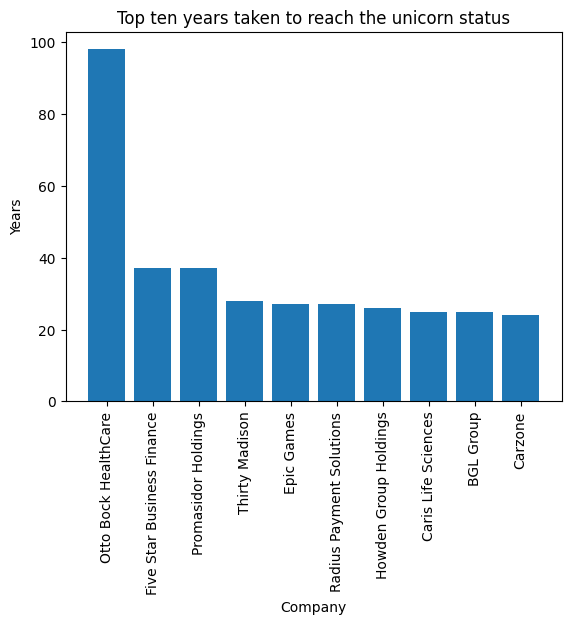

In [103]:
# Visualise the time it took companies to reach unicorn status
plt.bar(
    plot_df.company,
    plot_df.years_till_joined
)


plt.title("Top ten years taken to reach the unicorn status")
plt.xlabel("Company")
plt.ylabel("Years")
plt.xticks(rotation=90)

plt.show

In [104]:
# Filter out valuation outliers and convert valuation back to billions
val_quantiles = np.quantile(df["valuation_mm_usd"], [0.25, 0.5, 0.75])
val_iqr = val_quantiles[2] - val_quantiles[0]
outlier_bounds = (
    val_quantiles[0] - val_iqr * 1.5,
    val_quantiles[2] + val_iqr * 1.5
)

valuation_df = df.copy()
valuation_df = valuation_df[(valuation_df["valuation_mm_usd"] > outlier_bounds[0]) & (valuation_df["valuation_mm_usd"] < outlier_bounds[1])]
valuation_df["valuation_bn_usd"] = valuation_df["valuation_mm_usd"] / 1000

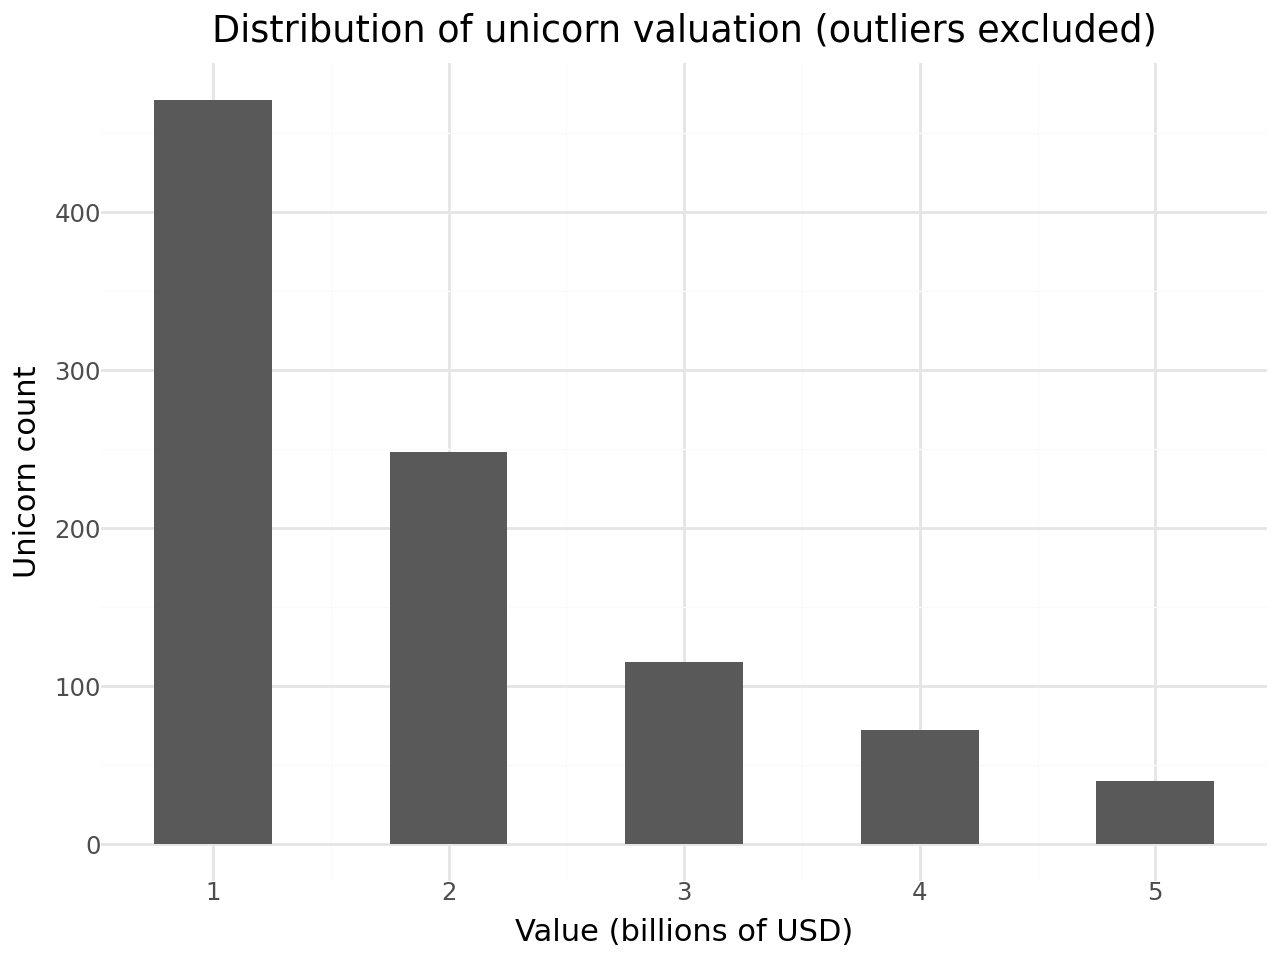

In [105]:
# Plot the valuation distribution
(
    gg.ggplot(data = valuation_df, mapping = gg.aes(x = "valuation_bn_usd")) + 
        gg.geom_histogram(binwidth = 0.5) +
        gg.theme_minimal() + 
        gg.labs(
            title="Distribution of unicorn valuation (outliers excluded)",
            x = "Value (billions of USD)",
            y = "Unicorn count"
        )
)
